<a href="https://colab.research.google.com/github/Playcrusher/full-course-html-and-css/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow
import cv2

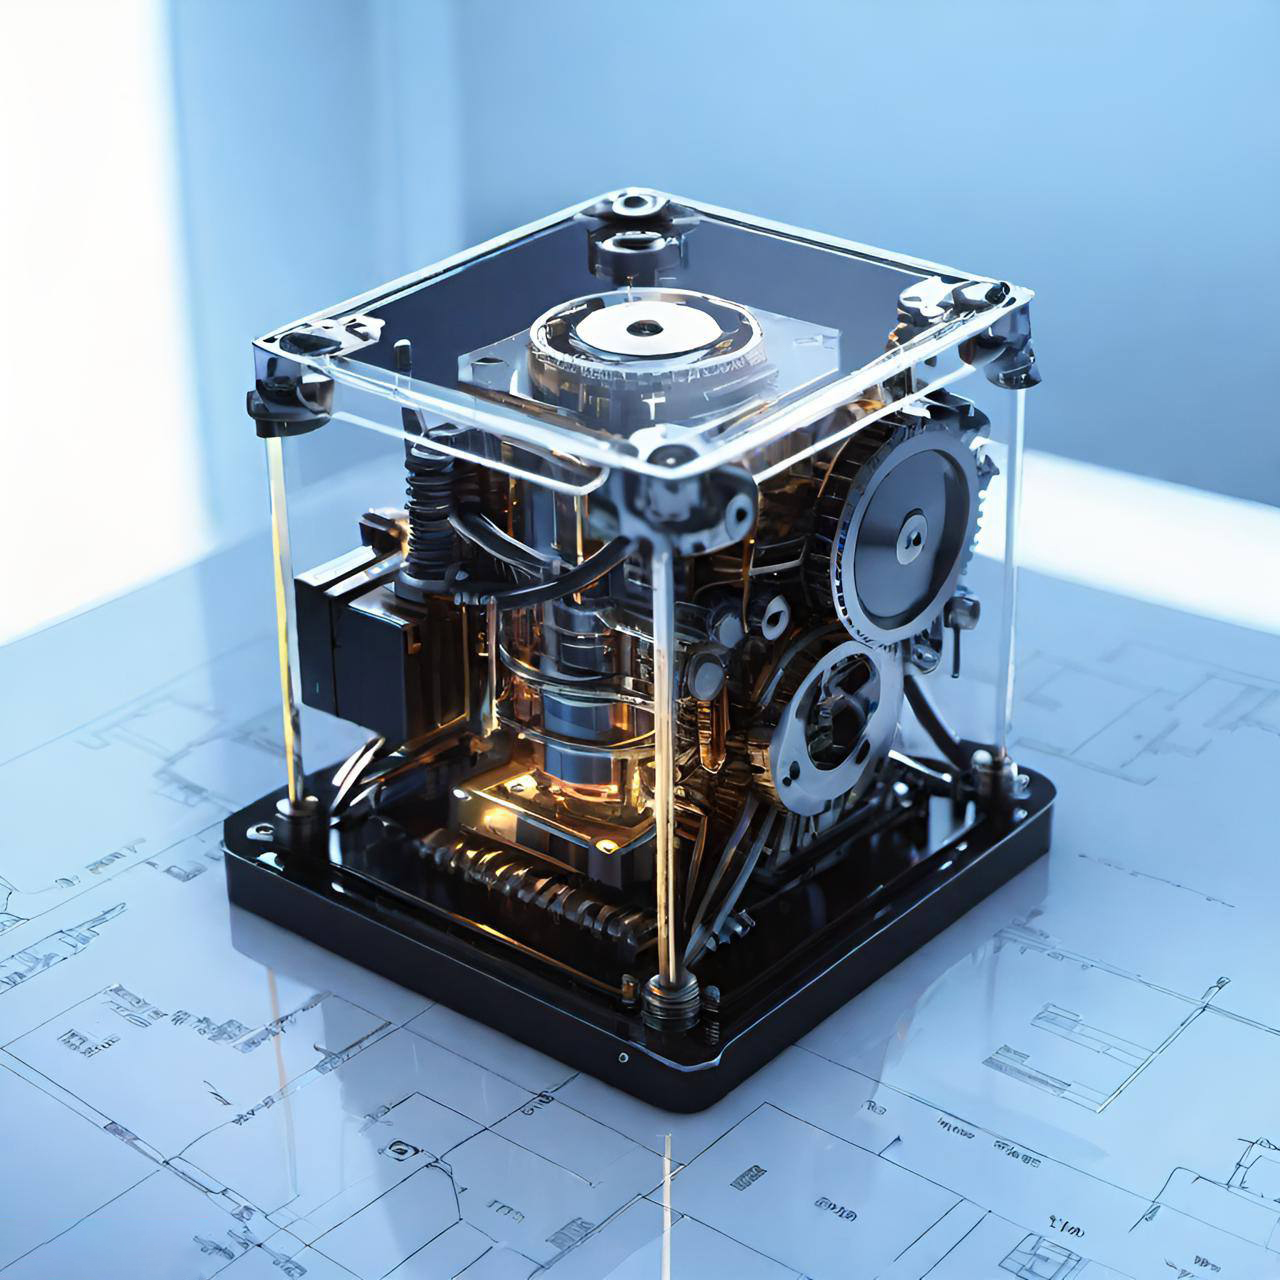

In [9]:
img = cv2.imread('hero.jpg')
cv2_imshow(img)

In [7]:
from google.colab import files

# Mengunggah gambar
uploaded = files.upload()

link_gambar = list(uploaded.keys())[0]
image = cv2.imread(link_gambar)

Saving chris.jpg to chris.jpg


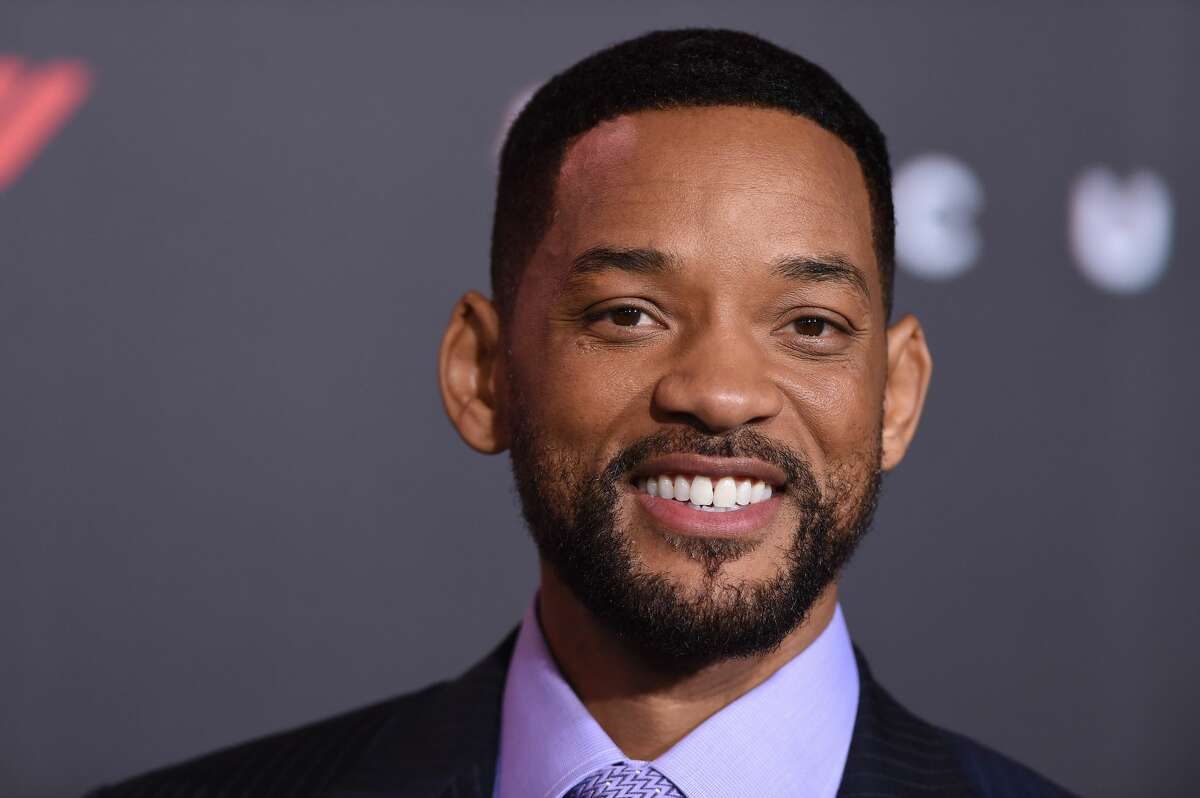

In [8]:
cv2_imshow(image)

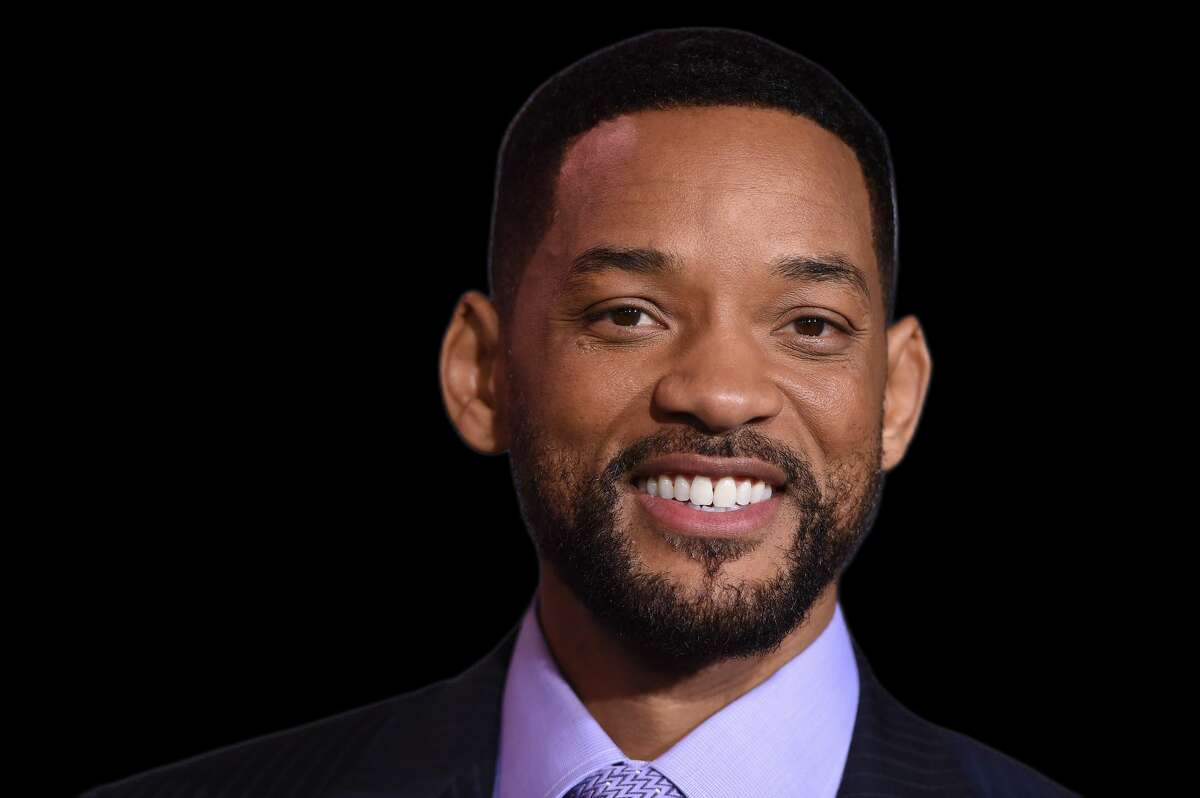

In [10]:
!pip install rembg
!pip install Pillow==9.1.0

from rembg import remove

output_path = 'output.png'
link_gambar = 'chris.jpg'

with open(link_gambar, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

cv2_imshow(cv2.imread(output_path))

In [11]:
import numpy as np

def change_back(background, img):
    """Sebuah fungsi yang mengganti latar belakang gambar dengan gambar lain.
    Menerima dua argumen: gambar latar belakang (background) dan gambar itu sendiri (img).
    Fungsi akan dimulai dari sudut kiri atas gambar. Ia akan mencari semua piksel hitam (dengan nilai 0)
    dan menggantinya dengan piksel dari gambar latar belakang"""

    x, y = 0, 0
    background = cv2.resize(background, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_AREA)
    res = np.copy(background)
    place = res[y: y + img.shape[0], x: x + img.shape[1]]
    a = img[..., 3:].repeat(3, axis=2).astype('uint16')
    place[...] = (place.astype('uint16') * (255 - a) // 255) + img[..., :3].astype('uint16') * a // 255
    return res

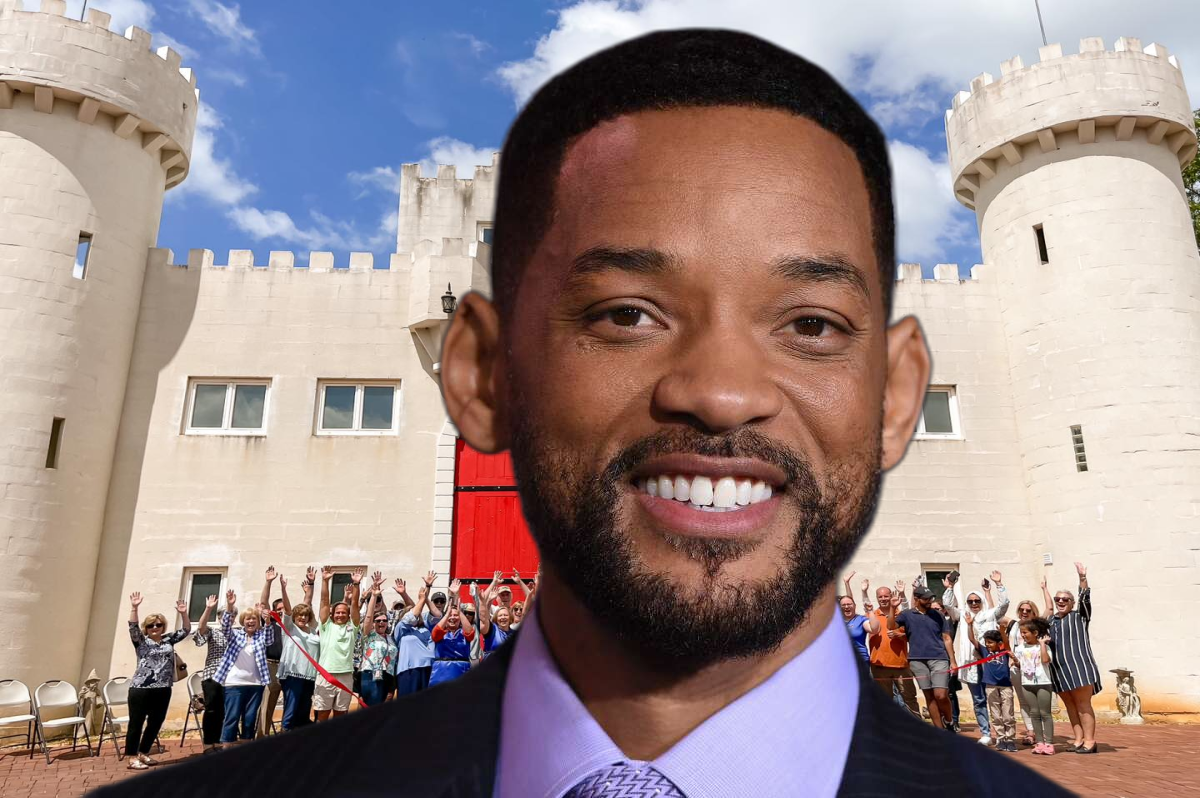

In [12]:
image = cv2.imread('output.png', cv2.IMREAD_UNCHANGED)
back = cv2.imread('castle.jpg')
result = change_back(back, image)

cv2.imwrite("result.png", result)
cv2_imshow(cv2.imread("result.png"))